### 텍스트 분류(Text Classification)
- 분류하는 텍스트 데이터는 내용과 레이블로 구성되어 있다.

  텍스트 내용을 기반으로 레이블을 분류하는 것이 목적이다.
  
  ex) 스팸 메일 분류, 뉴스 기사의 주제 분류, 영화평의 선호도 분류 등
  

- 이진 분류: 두개의 선택 중에서 정답을 고르는 형식
- 다중 클래스 분류: 세개 이상의 선택에서 정답을 고르는 경우

### Keras에서 입력 텍스트 처리 함수


In [1]:
# Tokenizer: 입력 텍스트를 숫자로 변환
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data) # 텍스트의 각 단어에 고유한 숫자 부여
sequences = tokenizer.texts_to_sequences(text_data) # 단어를 숫자값으로

NameError: name 'text_data' is not defined

In [2]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = 1000,
                                                         test_split = 0.2)

max_len = 100
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences (X_test, maxlen = max_len)

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',
              metrics = ['acc'])

history = model.fit(X_train, y_train, batch_size = 128, epochs = 20,
                    validation_data = (X_test, y_test))

Epoch 1/20
71/71 [==============================] - 27s 373ms/step - loss: 2.6249 - acc: 0.3373 - val_loss: 2.4117 - val_acc: 0.3620
Epoch 2/20
71/71 [==============================] - 25s 350ms/step - loss: 2.2383 - acc: 0.4164 - val_loss: 1.9951 - val_acc: 0.5049
Epoch 3/20
71/71 [==============================] - 25s 350ms/step - loss: 1.9605 - acc: 0.4950 - val_loss: 1.8797 - val_acc: 0.5009
Epoch 4/20
71/71 [==============================] - 25s 347ms/step - loss: 1.7719 - acc: 0.5469 - val_loss: 1.7388 - val_acc: 0.5659
Epoch 5/20
71/71 [==============================] - 24s 344ms/step - loss: 1.6757 - acc: 0.5660 - val_loss: 1.6751 - val_acc: 0.5752
Epoch 6/20
71/71 [==============================] - 25s 346ms/step - loss: 1.6388 - acc: 0.5736 - val_loss: 1.6702 - val_acc: 0.5784
Epoch 7/20
71/71 [==============================] - 25s 351ms/step - loss: 1.5753 - acc: 0.5961 - val_loss: 1.6169 - val_acc: 0.5913
Epoch 8/20
71/71 [==============================] - 27s 383ms/step - 

In [11]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 85ms/step - loss: 2.7080 - accuracy: 0.5158 - val_loss: 1.8717 - val_accuracy: 0.5840
Epoch 2/20
16/16 [==============================] - 1s 62ms/step - loss: 1.6356 - accuracy: 0.6518 - val_loss: 1.4439 - val_accuracy: 0.6720
Epoch 3/20
16/16 [==============================] - 1s 64ms/step - loss: 1.3488 - accuracy: 0.7053 - val_loss: 1.2808 - val_accuracy: 0.7120
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 1.1854 - accuracy: 0.7374 - val_loss: 1.1895 - val_accuracy: 0.7300
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 1.0615 - accuracy: 0.7658 - val_loss: 1.1143 - val_accuracy: 0.7640
Epoch 6/20
16/16 [==============================] - 1s 66ms/step - loss: 0.9617 - accuracy: 0.7821 - val_loss: 1.0531 - val_accuracy: 0.7710
Epoch 7/20
16/16 [==============================] - 1s 71ms/step - loss: 0.8795 - accuracy: 0.8028 - val_loss: 1.0119 - val_accuracy: 0.7750
Epoch 8/20
16

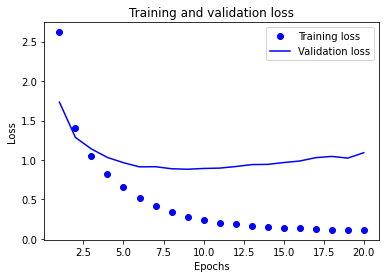

In [6]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 4ms/step - loss: 1.3077 - accuracy: 0.7792


In [10]:
results

[1.3076517581939697, 0.7791629433631897]